# Q1
### Train a machine learning model using the training file to predict the values of the ‘Dataset’ column for the test file. ( Evaluation on the basis on Accuracy score)

#### BY : Harsh Sagar Garg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [5]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Preprocessing the Data

In [6]:
data.shape

(466, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
Age                           466 non-null int64
Gender                        466 non-null object
Total_Bilirubin               466 non-null float64
Direct_Bilirubin              466 non-null float64
Alkaline_Phosphotase          466 non-null int64
Alamine_Aminotransferase      466 non-null int64
Aspartate_Aminotransferase    466 non-null int64
Total_Protiens                466 non-null float64
Albumin                       466 non-null float64
Albumin_and_Globulin_Ratio    463 non-null float64
Dataset                       466 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 40.1+ KB


#### ^ here we can see that only 463 rows of Albumin_and_Globulin_Ratio are not-null

## Since only 3 Rows have Albumin_and_Globulin_Ratio are null, Replace them with mean

In [8]:
data["Albumin_and_Globulin_Ratio"].fillna(0.6, inplace = True,axis=0) 


In [9]:
data.shape

(466, 11)

In [10]:
## Except Gender all other values are float or int
## Hence converting Gender into float
data['Gender'] = pd.factorize(data.Gender)[0]


In [11]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,0,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,1,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,0,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,0,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [12]:
data['Globulin'] = data.Albumin/data.Albumin_and_Globulin_Ratio

## Studying Corrolation Features


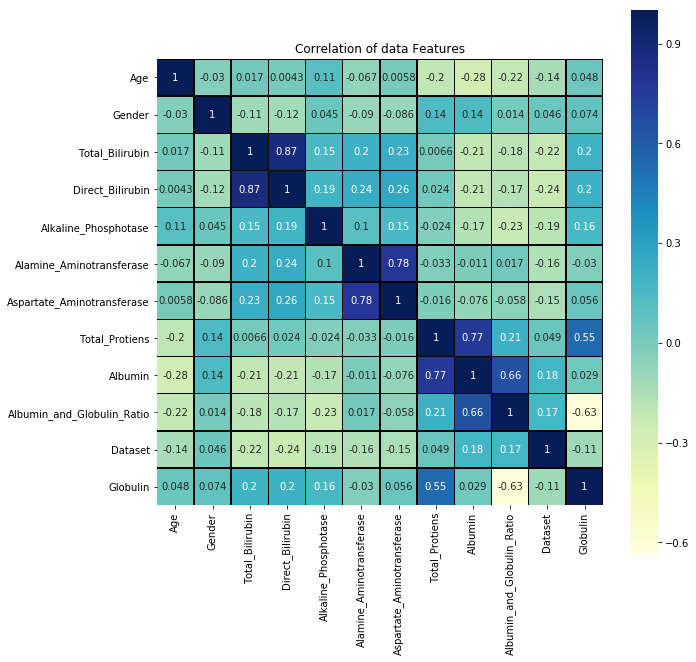

In [13]:

import seaborn as sns

plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),linewidths=0.5,linecolor='black',vmax=1.0,square=True,cmap="YlGnBu",annot=True)
plt.title('Correlation of data Features')
plt.show()


#### From the above heat map, we can see that total bilirubin and Direct Bilirubin have DIRECT RELATION
#### we Will create a new column


In [14]:
data['bilirubin'] = data.Total_Bilirubin - data.Direct_Bilirubin

In [15]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Globulin,bilirubin
0,60,0,6.3,3.2,314,118,114,6.6,3.7,1.27,1,2.913386,3.1
1,31,1,0.8,0.2,158,21,16,6.0,3.0,1.00,1,3.000000,0.6
2,60,0,19.6,9.5,466,46,52,6.1,2.0,0.40,1,5.000000,10.1
3,34,0,8.7,4.0,298,58,138,5.8,2.4,0.70,1,3.428571,4.7
4,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1,3.500000,0.7


## Splitting the data 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
feature_cols =  ['Age',
     'Total_Bilirubin',
     'Alkaline_Phosphotase',
     'Alamine_Aminotransferase',
     'Aspartate_Aminotransferase',
     'Total_Protiens',
     'Albumin',
     'Globulin',
     'Gender']

In [18]:
X = data[feature_cols]

In [19]:
X.shape

(466, 9)

In [20]:
y = data['Dataset']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)

# CLASSIFICATION ALGORITHMS

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logReg = LogisticRegression(solver='saga',multi_class='multinomial',max_iter=100000,
                        tol=1e-2)

In [24]:
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.01, verbose=0, warm_start=False)

In [25]:
y_pred = logReg.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_pred,y_test)

0.7872340425531915


## Gradient Boost Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gb = GradientBoostingClassifier(n_estimators=27,loss='exponential',learning_rate=0.1)

In [30]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=27,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [31]:
y_pred = gb.predict(X_test)

In [44]:
## ACCURACY
accuracy_score(y_pred,y_test)

0.776595744680851

In [45]:
## Running same algo by changing value of n_estimators

In [46]:
gb1 = GradientBoostingClassifier(n_estimators=9,loss='exponential',learning_rate=0.1)

In [47]:
gb1.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=9,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [48]:
y_pred = gb1.predict(X_test)

In [49]:
## ACCURACY
accuracy_score(y_pred,y_test)

0.776595744680851

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf1 = RandomForestClassifier(n_estimators=200)

In [57]:
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:

y_pred = rf1.predict(X_test)

In [59]:
## ACCURACY
accuracy_score(y_pred,y_test)

0.6914893617021277

### Changing n_estimators in Random Forest

In [60]:
rf = RandomForestClassifier(n_estimators=10)

In [61]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
y_pred = rf.predict(X_test)

In [63]:
# ACCURACY
accuracy_score(y_pred,y_test)

0.7021276595744681

## KNN Classifier

In [64]:
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_pred)

In [66]:
cm

array([[60, 14],
       [ 9, 11]])

In [67]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of model is  ' + str(round(accuracy, 2)) + ' %.')


Accuracy of model is  75.53 %.


## Using Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
classifier = DecisionTreeClassifier(criterion='gini',random_state=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of model is  ' + str(round(accuracy, 2)) + ' %.')


Accuracy of model is  72.34 %.


## By Guassian Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train).predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of model is ' + str(round(accuracy, 2)) + ' %.')


Accuracy of model is 48.94 %.


## SVC

In [74]:
from sklearn.svm import SVC

In [75]:
svmf = SVC(gamma='auto',random_state=1,probability=True,decision_function_shape='ovo')

In [76]:
svmf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)

In [77]:
y_pred = svmf.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of model is ' + str(round(accuracy, 2)) + ' %.')


Accuracy of model is 79.79 %.


### using ovr as decision_function_shape in SVC

In [79]:
from sklearn.svm import SVC
svmf = SVC(gamma='auto',random_state=1,probability=True,decision_function_shape='ovr')

In [80]:
svmf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)

In [502]:
y_pred = svmf.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of model is ' + str(round(accuracy, 2)) + ' %.')


Accuracy of model is 79.79 %.


## We are using Random Forest, beacuse it has good Accuracy Score 

#### Having n_estimators =200

In [83]:
tdata = pd.read_csv('test.csv')

In [84]:
tdata["Albumin_and_Globulin_Ratio"].fillna(0.6, inplace = True,axis=0) 


In [85]:
tdata['Gender'] = pd.factorize(tdata.Gender)[0]

In [86]:
tdata['Globulin'] = tdata.Albumin/tdata.Albumin_and_Globulin_Ratio

In [87]:
tdata['bilirubin'] = tdata.Total_Bilirubin - tdata.Direct_Bilirubin

In [88]:
tdata.fillna(tdata.mean(),inplace=True)

In [89]:
tdata.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Globulin,bilirubin
0,46,0,0.8,0.2,160,31,40,7.3,3.8,1.10,3.454545,0.6
1,15,0,0.8,0.2,380,25,66,6.1,3.7,1.50,2.466667,0.6
2,66,1,4.2,2.1,159,15,30,7.1,2.2,0.40,5.500000,2.1
3,32,0,0.6,0.1,237,45,31,7.5,4.3,1.34,3.208955,0.5
4,60,0,2.6,1.2,171,42,37,5.4,2.7,1.00,2.700000,1.4


In [90]:
tdata.shape

(117, 12)

In [91]:
feature_cols_t =  ['Age',
     'Total_Bilirubin',
     'Alkaline_Phosphotase',
     'Alamine_Aminotransferase',
     'Aspartate_Aminotransferase',
     'Total_Protiens',
     'Albumin',
                
     'Globulin',
     'Gender']

In [92]:
Xt = tdata[feature_cols_t]

In [93]:
ans=rf1.predict(Xt)

In [94]:
ans

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1])

In [95]:
type(ans)

numpy.ndarray

In [96]:
resultFile = pd.DataFrame({'predictions':ans})

In [97]:
resultFile.head()

,predictions
0,1
1,2
2,1
3,1
4,1


In [98]:
resultFile.to_csv('predictions.csv')

### By: Harsh Sagar Garg